# Settings

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
from scipy import stats
from numpy.random import randn
import copy

# Soft thresholding

In [8]:
def soft_th(lam, x):
  """ lasso function
  :param lam:
  :param x:
  :return: x - lam (x > lam)
          0       (|x| <= lam)
          x + lam (x < -lam)
  """
  return np.sign(x) * np.maximum(np.abs(x)-lam, 0)

Text(-1.5, 1, 'lam=5')

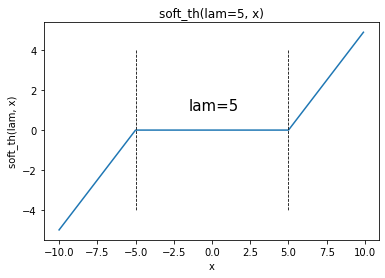

In [ ]:
x_seq = np.arange(-10, 10, 0.1)
plt.xlabel('x')
plt.ylabel('soft_th(lam, x)')
plt.plot(x_seq, soft_th(5, x_seq))
plt.plot([-5, -5], [4, -4], c='black', linestyle='dashed', linewidth=0.8)
plt.plot([5, 5], [4, -4], c='black', linestyle='dashed', linewidth=0.8)
plt.title('soft_th(lam=5, x)')
plt.text(-1.5, 1, 'lam=5', fontsize=15)

# Lasso

In [29]:
def lasso(x, y, lam=0):
  X = copy.copy(x)
  n, p = X.shape

  # standardization
  X_bar = np.zeros(p) 
  s = np.zeros(p)
  for j in range(p):
    X_bar[j] = np.mean(X[:, j])
  for j in range(p):
    s[j] = np.std(X[:, j])
    X[:, j] = (X[:, j] - X_bar[j]) / s[j]
  y_bar = np.mean(y)
  y = y - y_bar

  # training
  eps = 1
  beta = np.zeros(p)
  beta_old = np.zeros(p)
  while eps > 0.001:
    for j in range(p):
      index = list(set(range(p))-{j}) # remove update index
      r = y - X[:, index]@beta[index]
      beta[j] = soft_th(lam, r.T@X[:, j]/n)
    eps = np.max(np.abs(beta - beta_old))
    beta_old = beta
  
  # calculate beta_0
  for j in range(p):
    beta[j] = beta[j] / s[j]
  beta_0 = y_bar - X_bar.T@beta
  return {'beta':beta, 'beta_0':beta_0}

In [30]:
!wget https://web.stanford.edu/~hastie/StatLearnSparsity_files/DATA/crime.txt

--2020-09-24 05:41:08--  https://web.stanford.edu/~hastie/StatLearnSparsity_files/DATA/crime.txt
Resolving web.stanford.edu (web.stanford.edu)... 171.67.215.200
Connecting to web.stanford.edu (web.stanford.edu)|171.67.215.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1143 (1.1K) [text/plain]
Saving to: ‘crime.txt.1’

crime.txt.1         100%[===================>]   1.12K  --.-KB/s    in 0s      

2020-09-24 05:41:09 (55.8 MB/s) - ‘crime.txt.1’ saved [1143/1143]



In [13]:
df = np.loadtxt('crime.txt', delimiter='\t')
X = df[:, [i for i in range(2, 7, 1)]]
p = X.shape[1]
y = df[:, 0]

In [31]:
def plot_all(f, X=X, y=y):
  lambda_seq = np.arange(0, 200, 0.5)
  plt.xlim(0, 200)
  plt.ylim(-7.5, 15)
  plt.xlabel('lambda')
  plt.ylabel('beta')
  labels = ['Annual funding for police', 
            'over 25 who graduated from high school',
            'aged 16-19 who do not attend high school',
            'college students aged 18-24',
            'aged 25 and over who graduated from a 4-year university']
  for j in range(p):
    coef_seq = []
    for l in lambda_seq:
      coef_seq.append(f(X, y, l)['beta'][j])
    print(coef_seq)
    plt.plot(lambda_seq, coef_seq, label=f'{labels[j]}')
  plt.legend()

[11.641806087940376, 11.589268985919189, 11.536731883898003, 11.484194781876813, 11.431657679855626, 11.379120577834438, 11.326583475813248, 11.274046373792062, 11.221509271770874, 11.168972169749686, 11.1164350677285, 11.063897965707309, 11.011360863686122, 10.958823761664934, 10.906286659643747, 10.853749557622562, 10.818102899125423, 10.78527843802596, 10.752453976926498, 10.719629515827032, 10.68680505472757, 10.653980593628107, 10.62115613252864, 10.588331671429177, 10.553245889343943, 10.51276352871011, 10.472281168076279, 10.431798807442451, 10.391316446808618, 10.350834086174785, 10.310351725540954, 10.269869364907123, 10.229387004273292, 10.188904643639459, 10.148422283005626, 10.107939922371795, 10.067457561737966, 10.026975201104133, 9.986492840470303, 9.94601047983647, 9.90552811920264, 9.865045758568808, 9.824563397934975, 9.784081037301148, 9.743598676667315, 9.703116316033483, 9.662633955399652, 9.62215159476582, 9.581669234131986, 9.541186873498155, 9.500704512864324, 9

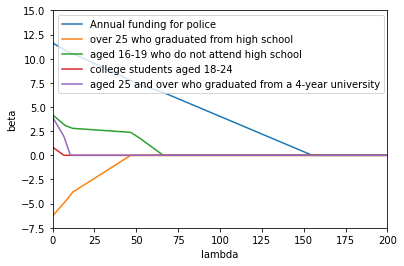

In [32]:
plot_all(f=lasso)

# Ridge

In [33]:
def ridge(x, y, lam=0):
  X = copy.copy(x)
  n, p = X.shape

  # standardization
  X_bar = np.zeros(p) 
  s = np.zeros(p)
  for j in range(p):
    X_bar[j] = np.mean(X[:, j])
  for j in range(p):
    s[j] = np.std(X[:, j])
    X[:, j] = (X[:, j] - X_bar[j]) / s[j]
  y_bar = np.mean(y)
  y = y - y_bar

  # training
  beta = np.linalg.inv(X.T@X + n*lam*np.eye(p))@X.T@y
  for j in range(p):
    beta[j] = beta[j] / s[j]

  # calculate beta_0
  for j in range(p):
    beta[j] = beta[j] / s[j]
  beta_0 = y_bar - X_bar.T@beta
  return {'beta':beta, 'beta_0':beta_0}

[0.8025948051720653, 0.5156207856488778, 0.3872979413374484, 0.3117002390735474, 0.2613134762103308, 0.22516565442432918, 0.19790733202334862, 0.17659170222881262, 0.15945332570687354, 0.14536688965149838, 0.1335798706508993, 0.12356936232311623, 0.11496040160507794, 0.10747694439385354, 0.10091117542993887, 0.09510360381138043, 0.08992975738556051, 0.08529105249988156, 0.08110838382216073, 0.07731753203583765, 0.07386581422061021, 0.07070960100154376, 0.06781244928620775, 0.06514367938484969, 0.06267727770382187, 0.06039104120558025, 0.058265903631726054, 0.056285399937227455, 0.054435236925171604, 0.05270294627960472, 0.05107760210621502, 0.04954958939936742, 0.04811041302866589, 0.046752539201242914, 0.04546926313167549, 0.044254597997736185, 0.04310318128951224, 0.04201019545262235, 0.04097130034204433, 0.03998257548448399, 0.039040470526080694, 0.0381417625422848, 0.03728351912577189, 0.036463066359763305, 0.03567796093837993, 0.03492596582054574, 0.03420502890556734, 0.0335132643

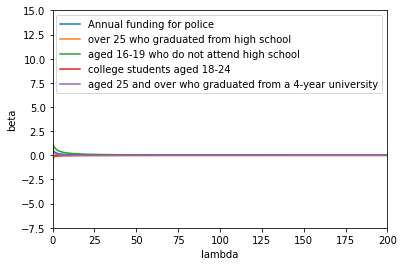

In [34]:
plot_all(f=ridge)

# Which feature will be chosen?
* LassoCV: Lasso with cross validation

In [35]:
from sklearn.linear_model import Lasso, LassoCV

In [38]:
Las = Lasso(alpha=200)
Las.fit(X, y)
Las.coef_

array([10.59334589, -3.70734885,  0.        , -0.        , -0.        ])

In [41]:
Lcv = LassoCV(alphas=np.arange(0.1, 300, 0.1), cv=10)
Lcv.fit(X, y)
print(Lcv.alpha_)
print(Lcv.coef_)

237.4
[10.356794   -3.28359515  0.         -0.         -0.        ]


In [46]:
  labels = ['Annual funding for police', 
            'over 25 who graduated from high school',
            'aged 16-19 who do not attend high school',
            'college students aged 18-24',
            'aged 25 and over who graduated from a 4-year university']

In [48]:
for i, b in enumerate(np.abs(Lcv.coef_)>0):
  if b:
    print(f'SELECTED: {labels[i]}')
  else:
    print(f'DISCARDED: {labels[i]}')

SELECTED: Annual funding for police
SELECTED: over 25 who graduated from high school
DISCARDED: aged 16-19 who do not attend high school
DISCARDED: college students aged 18-24
DISCARDED: aged 25 and over who graduated from a 4-year university
